# Brincando com estatística e probabilidades com o problema de Monty Hall 

<p>Resolver este problema não é algo inédito. Existem muitos e muitos sites, blogs, artigos, etc dedicados a explicar e explorar este domínio.</p> 

<p>Neste artigo, quero apenas [de]mo[n]strar, através de algumas simulações divertidas, como as chances do jogador podem aumentar ou diminuir dependendo das escolhas que o jogador fizer.</p>


<p>O presente código, neste <i>Notebook</i>, simula através de uma demonstração empírica o problema e avalia as probabilidades associadas à cada situação apresentada ao jogador. Sejam elas:
<p>1. Quais as chances, em termos de probabilidade, do jogador encontrar um carro se ele <b>sempre trocar de porta</b>?
<p>2. E se o jogador permaner sempre com a primeira escolha, ou seja, <b>nunca trocar de porta</b>? 
<p>3. Avaliamos também a probabilidade associada se o jogador, aleatoriamente, <b>manter a porta escolhida ou trocar</b>. O que será que ocorre neste caso? Quais as suas chances? 

    
<p>Se desjejar saber mais sobre o problema: <a href="https://en.wikipedia.org/wiki/Monty_Hall_problem">Monty_Hall_problem</a></p>




## Um enunciado para o problema
<img src="Monty_hall_problem.jpg"/>

## Importando os módulos 

Neste caso usaremos apenas a bibloteca numpy do python

In [1]:
# import das bibliotcas necessárias
import numpy as np

In [3]:
# Configurando a situação inicial para apresentação do problema ao jogador
doors = np.array([0, 0, 0]) # Cria uma lista inicial
doors[np.random.choice([0,1,2])] = 1 # escolhe aleatoriamente uma posição e atualiza para o valor 1 
                                     # (colocando o carro atrás de uma das portas)

print("O apresentador já sabe que o carro esta atrás da {}ª porta.".format(np.where(doors==1)[0][0]+1))

O apresentador já sabe que o carro esta atrás da 2ª porta.


In [4]:
# Primeira escolha -> o jogador escolha a porta
#i_choice_1 = np.random.randint(3, size=1)[0]
i_choice_1 = np.random.choice([0,1,2])
#i_choice_1 , #doors[i_choice_1]

print("O jogador escolheu a {}ª porta.".format(i_choice_1+1))

O jogador escolheu a 2ª porta.


In [5]:
# O apresentador abre uma porta (não escolhida pelo jogador) contendo um bode 
i_choice_x = [x for x in [0,1,2] if not x==i_choice_1 and not doors[x]==1]
#print("i_choice_x",i_choice_x)
i_door_open = np.random.choice(i_choice_x)
print(" O apresentador abriu a {}ª porta.".format(i_door_open+1))  

 O apresentador abriu a 3ª porta.


In [6]:
# Momento da Segunda escolha -> jogador. 
# O apresentador pergunta ao jogador se ele escolhe outra porta ou mantém a porta ecolhida
# se for igual a True ele manteve a porta escolhida, caso contrário ele trocou de porta
i_other_door = [x for x in [0,1,2] if x!=i_choice_1 and x!=i_door_open]
#print('i_other_door',i_other_door)
i_choice_2 = np.random.choice([i_choice_1, i_other_door[0]])
print(" O jogador {} porta.".format("mantente a" if (i_choice_2 == i_choice_1) else "trocou de"))

 O jogador trocou de porta.


In [7]:
# O Jogador, então, abre a porta escolhida.
# Se for igual a 1 (True) ele ganhou o carro, caso contrário ele ganhou um bode.
print("O jogador ganhou {}.".format("o CARRO" if doors[i_choice_2] == 1 else "um BODE"))

O jogador ganhou um BODE.


## 1ª Simulação do Problema

> O código abaixo cria uma função que executará uma simulação de um cenário completo para o jogo. <br>
> O resultado será uma sequência de passos mostrando cada escolha do jogador e a ação do apresentador. <br>
> Para cada escolha do jogador, a partir de cada interação com o apresentador, o resultado poderá ser diferente.<br>
> Ou seja, o jogador poderá ou não ganhar o carro. Mas ele terá mais ou menos chances dependendo da escolha que fizer.

In [69]:

def monty_hall_problem1():
    
    print("O Jogo se inicia...")
    
    doors_index = [0,1,2]
    
    # Configurando a situação inicial para apresentação do problema ao jogador
    doors = np.array([0, 0, 0]) # Cria uma lista inicial
    doors[np.random.choice(doors_index)] = 1 # escolhe aleatoriamente uma posição e atualiza para o valor 1 
                                         # (colocando o carro atrás de uma das portas)
    print("\U0001f399\uFE0F O apresentador sabe que o carro esta atrás da {}ª porta.".format(np.where(doors==1)[0][0]+1))
    
    
    # Momento da Primeira escolha -> o jogador escolha a porta
    #i_choice_1 = np.random.randint(3, size=1)[0]
    i_choice_1 = np.random.choice(doors_index)
    print("\U0001f64e O jogador escolheu a {}ª porta.".format(i_choice_1+1))


    # O apresentador abre uma porta (não escolhida pelo jogador) contendo um bode 
    i_choice_x = [x for x in doors_index if not x==i_choice_1 and not doors[x]==1]
    #print("i_choice_x",i_choice_x)
    i_door_open = np.random.choice(i_choice_x)
    print("\U0001f399\uFE0F O apresentador abriu a {}ª porta.".format(i_door_open+1))    
    

    # Momento da Segunda escolha -> jogador. 
    # O apresentador pergunta ao jogador se ele escolhe outra porta ou mantém a porta ecolhida
    # se for igual a True ele manteve a porta escolhida, caso contrário ele trocou de porta
    i_other_door = [x for x in doors_index if x!=i_choice_1 and x!=i_door_open]
    # print('i_other_door',i_other_door)
    i_choice_2 = np.random.choice([i_choice_1,i_other_door[0]])
    print("\U0001f64e O jogador {} porta.".format("mantenve a" if (i_choice_2 == i_choice_1) else "trocou de"))    
    
    
    # O Jogador, então, abre a porta escolhida.
    # Se for igual a 1 (True) ele ganhou o carro, caso contrário ele ganhou um bode.
    print("\U0001f64e O jogador ganhou {}".format("o \U0001f697 \U0001f929" if doors[i_choice_2] == 1 else "um \U0001f410  \U0001f62d"))    

In [70]:
for i in range(1,8):
    print(f"Rodada {i}")
    monty_hall_problem1()
    print("-"*20)

Rodada 1
O Jogo se inicia...
🎙️ O apresentador sabe que o carro esta atrás da 2ª porta.
🙎 O jogador escolheu a 3ª porta.
🎙️ O apresentador abriu a 1ª porta.
🙎 O jogador trocou de porta.
🙎 O jogador ganhou o 🚗 🤩
--------------------
Rodada 2
O Jogo se inicia...
🎙️ O apresentador sabe que o carro esta atrás da 1ª porta.
🙎 O jogador escolheu a 3ª porta.
🎙️ O apresentador abriu a 2ª porta.
🙎 O jogador mantenve a porta.
🙎 O jogador ganhou um 🐐  😭
--------------------
Rodada 3
O Jogo se inicia...
🎙️ O apresentador sabe que o carro esta atrás da 3ª porta.
🙎 O jogador escolheu a 2ª porta.
🎙️ O apresentador abriu a 1ª porta.
🙎 O jogador mantenve a porta.
🙎 O jogador ganhou um 🐐  😭
--------------------
Rodada 4
O Jogo se inicia...
🎙️ O apresentador sabe que o carro esta atrás da 1ª porta.
🙎 O jogador escolheu a 2ª porta.
🎙️ O apresentador abriu a 3ª porta.
🙎 O jogador trocou de porta.
🙎 O jogador ganhou o 🚗 🤩
--------------------
Rodada 5
O Jogo se inicia...
🎙️ O apresentador sabe que o carro es

## 2ª Simulação do Problema

> O código abaixo cria uma função que executará uma simulação para cada ecolha do jogador. <br>
> O resultado da execução desta função retornará se o jogador ganhou o carro ou um bode. <br>
> Para definir as escolha do jogador usaremos o valores 0 (zero), 1 (um) ou outro valor qualquer.<br>
> * 0 - o jogador sempre trocará de porta;<br>
> * 1 - o jogador nunca trocará de porta;<br>
> * ? - o jogador fará uma escolha aleatória entre a porta autal e a outra porta.


In [93]:
# essa função simula uma roda de escolhas para o problema 

def monty_hall_problem(change_door=0):
    """
    change_door == 0 => sempre troca de porta
    change_door == 1 => nunca troca de porta
    change_door == other value => escolhe aleatoriamente entre a porta autal e a outra porta
    """
    doors_index = [0, # 1ª porta
                   1, # 2ª porta
                   2] # 3ª porta
    
    # Configura a situação inicial
    doors = np.array([0, 0, 0]) # Cria uma lista inicial com valores zero (bodes).
    doors[np.random.choice(doors_index)] = 1 # escolhe aleatoriamente uma porta e atualiza para o valor 1 (carro).

    # Momento da primeira escolha -> jogador escolhe aleatoriamente uma porta
    door_1 = np.random.choice(doors_index)
    
    # Apresentador abre uma porta (dentre as duas opçoões disponíveis) contendo um 0 (bode).
    # Nesse ponto, é importnate destacar que o apresentador tem a informação de onde está o carro.
    door_x = np.random.choice([x for x in doors_index if x!=door_1 and doors[x]!=1]) # pega o elemento na posição 0 ou 1. 
    
    # Esse passo serve para identificar a outra porta disponível ao jogador, excluindo a que ele já escolheu.
    other_door = [x for x in doors_index if x!=door_1 and x!=door_x][0]
    
    # Momento da segunda escolha -> jogador. Ou ele muda de porta ou mantém a porta atual escolhida
    if change_door == 0: # sempre troca de porta
        door_2 = other_door
    elif change_door == 1: # nunca troca de porta
        door_2 = door_1
    else: # troca ou não, de porta
        door_2 = np.random.choice([door_1, other_door])
        
    # Abre a porta escolhida 
    return doors[door_2]

In [117]:
# Alguns testes 

print("Se sempre trocar de porta.")
for _ in range(10):
    print("\U0001f64e ganhou um \U0001f697 \U0001f929" if monty_hall_problem(0) == 1 else "\U0001f64e ganhou um \U0001f410 \U0001f62d")

Se sempre trocar de porta.
🙎 ganhou um 🐐 😭
🙎 ganhou um 🐐 😭
🙎 ganhou um 🚗 🤩
🙎 ganhou um 🚗 🤩
🙎 ganhou um 🐐 😭
🙎 ganhou um 🚗 🤩
🙎 ganhou um 🚗 🤩
🙎 ganhou um 🚗 🤩
🙎 ganhou um 🚗 🤩
🙎 ganhou um 🚗 🤩


## Simulando 100 mil rodadas e avaliando os resultados

In [126]:
%%time 
n_runs = 100000

r1 = sum([monty_hall_problem(0) for _ in range(n_runs) ])/n_runs*100 # sempre troca de porta
r2 = sum([monty_hall_problem(1) for _ in range(n_runs) ])/n_runs*100 # nunca troca de porta
r3 = sum([monty_hall_problem(2) for _ in range(n_runs) ])/n_runs*100 # troca ou não de porta

print(
    """
    Chances de ganhar se sempre trocar de porta: {0:3.0f}%
    Chances de ganhar se nunca trocar de porta:  {1:3.0f}%
    Chances de ganhar se trocar ou não de porta: {2:3.0f}%
    """.format(r1, r2, r3) 
)


    Chances de ganhar se sempre trocar de porta:  67%
    Chances de ganhar se nunca trocar de porta:   34%
    Chances de ganhar se trocar ou não de porta:  50%
    
Wall time: 12.9 s


## Vizualizando as simulações

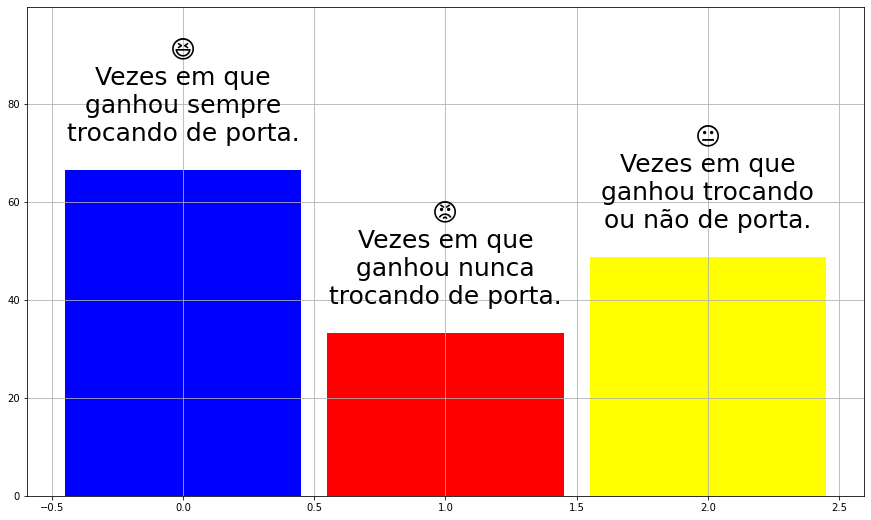

In [125]:
# código adaptado de: https://medium.com/towards-data-science/how-i-got-matplotlib-to-plot-apple-color-emojis-c983767b39e0

import matplotlib.pyplot as plt, numpy as np
from matplotlib.font_manager import FontProperties

freqs = [r1, r2, r3]
labels = ['😆\nVezes em que\nganhou sempre\ntrocando de porta.',
          '😡\nVezes em que\nganhou nunca\ntrocando de porta.', 
          '😐\nVezes em que\nganhou trocando\nou não de porta.']

plt.figure(figsize=(15,9))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.9, color=["blue","red","yellow"])
plt.ylim(0, plt.ylim()[1]+30)

# Gerando os rótulos
for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=25
    )
    
plt.grid(True)
plt.show()